Fake News
Yael Shafran, Yoav Ast, Omri Shtayer

Data Overview
In this database we have a list of fake news headlines and s
Target questions that could Identify fake news
1. Frequently used words in fake news
2. Specific Buzz words in Headlines that could identify fake news
3. Length of headlines & body in fake news V
4. Grammer structure of headlines 
    
    4.1 Connecting common words found in fake text to real text
    
    4.2 Connecting word counts in headlines (Although, and, as, because, but, either, even, how, however, if, or, otherwise, since, unless, what, when, whether)
    
    4.3 Exclamation (!) marks in headlines 
    
    4.4 Statistical usage in headlines (Usage of %, percent)
   
    4.5 Punctuation marks used in headlines ( , . :)
    
5. Specific sites that tend to publish fake news about specific topics?
    - will need to catagorize the headlines as topics based on words?
    
6. Replication of words inside the body and headlines

7. Are fake headlines without body text?

Our prediction will be from a formula - 


##fake > label = 0

Calculations:
1. Word2Vec
2. TFIDF
3. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns

from urllib.parse import urlparse
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import nltk
import nltk.data
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shtay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Step 1: Importing the Database and getting initial information from it

In [2]:
df_fake = pd.read_csv('Data/fakenews.csv')

In [3]:
df_fake

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [4]:
df_fake.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [5]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
URLs        4009 non-null object
Headline    4009 non-null object
Body        3988 non-null object
Label       4009 non-null int64
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [6]:
df_fake.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Identify Missing Data

In [7]:
df_fake.isnull().sum()
##We can see that there are 21 rows in which the Body is null
##In our case we don't want to take this null rows out - since they can help us identify fake news cases

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

Dealing with our missing Data - replacing all null values in the body with "No"

In [8]:
df_fake.fillna(value='NO',inplace=True)
df_fake.info()
##We can see that there are no more null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
URLs        4009 non-null object
Headline    4009 non-null object
Body        4009 non-null object
Label       4009 non-null int64
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [9]:
df_fake['Label'].value_counts()

0    2137
1    1872
Name: Label, dtype: int64

### Inserting Additional information of the length of the body and head to our table

In [10]:
df_fake['head_length'] = [len(headline) for headline in df_fake['Headline']]
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 5 columns):
URLs           4009 non-null object
Headline       4009 non-null object
Body           4009 non-null object
Label          4009 non-null int64
head_length    4009 non-null int64
dtypes: int64(2), object(3)
memory usage: 156.7+ KB


In [11]:
df_fake['body_length'] = [len(body) for body in df_fake['Body']]
df_fake.head()

,URLs,Headline,Body,Label,head_length,body_length
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,42,6412
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,66,3325
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,60,6580
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,68,630
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,43,213


4.1 Connecting common words found in fake text to real text

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shtay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
connectwords = ['Although', 'and', 'as', 'because', 'but', 'either', 'even', 'how', 'however','if', 'or', 'otherwise', 'since', 'unless', 'what', 'when', 'whether']

In [14]:
df_fakewords = ' '.join(df_fake[df_fake['Label'] == 0]['Headline'])
df_realwords = ' '.join(df_fake[df_fake['Label'] == 1]['Headline'])

fakewords = [word for word in nltk.tokenize.word_tokenize(df_fakewords) if word not in stopwords.words('english') and len(word) > 3]
realwords = [word for word in nltk.tokenize.word_tokenize(df_realwords) if word not in stopwords.words('english') and len(word) > 3]

In [15]:
common_fake = nltk.FreqDist(fakewords).most_common(25)

In [224]:
common_fake = nltk.FreqDist(fakewords).most_common(25)
common_real = nltk.FreqDist(realwords).most_common(25)
fake_ranks = []
fake_counts = []
real_ranks = []
real_counts = []

for ii, word in enumerate(reversed(common_fake)):
    fake_ranks.append(ii)
    fake_counts.append(word[1])

for ii, word in enumerate(reversed(common_real)):
    real_ranks.append(ii)
    real_counts.append(word[1])

plt.figure(figsize=(20, 7))

plt.scatter(fake_ranks, fake_counts)

for labels, fake_rank, fake_count in zip(common_fake, fake_ranks, fake_counts):
    plt.annotate(
        labels[0],
        xy = (fake_rank, fake_count)
    )

plt.scatter(real_ranks, real_counts)
plt.title('Real vs Fake Headlines')

for labels, real_rank, real_count in zip(common_real, real_ranks, real_counts):
    plt.annotate(
        labels[0],
        xy = (real_rank, real_count)
    )

real_patch = mpatches.Patch(color='orange', label='Real')
fake_patch = mpatches.Patch(color='blue', label='Fake')
plt.legend(handles=[real_patch, fake_patch])

plt.show()

NameError: name 'nltk' is not defined

In [17]:
common_fake

[('Trump', 205),
 ('Week', 163),
 ('2017', 153),
 ('Vegas', 102),
 ('Game', 96),
 ('Football', 93),
 ('Rankings', 87),
 ('Fantasy', 83),
 ('More', 83),
 ('With', 70),
 ('Ravens', 66),
 ('Stories', 62),
 ('Shooting', 61),
 ('From', 60),
 ('After', 54),
 ('Video', 54),
 ('Bucs', 53),
 ('Will', 52),
 ('Puerto', 50),
 ('Jets', 47),
 ('About', 46),
 ('Steelers', 46),
 ('President', 44),
 ('White', 43),
 ('This', 41)]

We can see that there are certain words used in fake or real news - 
we will grade those words later in the project

4.3 Exclamation (!) marks in headlines 

In [18]:
df_fake['excla'] = df_fake['Headline'].str.contains('!')==True
##Setting a Variable which tells us if the Headlines has a ! in the text
df_fake['excla_body'] = df_fake['Body'].str.contains('!')==True

In [19]:
df_fake['excla'] = df_fake.excla.astype(int)
df_fake['excla_body'] = df_fake.excla.astype(int)
df_fake

,URLs,Headline,Body,Label,head_length,body_length,excla,excla_body
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,42,6412,0,0
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,66,3325,0,0
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,60,6580,0,0
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,68,630,0,0
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,43,213,0,0
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0,32,645,0,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1,54,7575,0,0
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1,75,2229,0,0
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1,58,2712,0,0
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1,73,1373,0,0


In [20]:
fake_word = pd.DataFrame(common_fake)
fake_word = fake_word.drop(1,axis=1)
fake_word['word'] = fake_word[0]
fake_word

,0,word
0,Trump,Trump
1,Week,Week
2,2017,2017
3,Vegas,Vegas
4,Game,Game
5,Football,Football
6,Rankings,Rankings
7,Fantasy,Fantasy
8,More,More
9,With,With


In [21]:
def headwordtoco(x):
    df_fake[x] = df_fake['Headline'].str.contains(x)==True
    df_fake[x] = df_fake[x]*1

In [22]:
for words in fake_word['word']:
    df_fake[words] = df_fake['Headline'].str.contains(words)==True
    df_fake[words] = df_fake[words].astype(int)

In [23]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 33 columns):
URLs           4009 non-null object
Headline       4009 non-null object
Body           4009 non-null object
Label          4009 non-null int64
head_length    4009 non-null int64
body_length    4009 non-null int64
excla          4009 non-null int32
excla_body     4009 non-null int32
Trump          4009 non-null int32
Week           4009 non-null int32
2017           4009 non-null int32
Vegas          4009 non-null int32
Game           4009 non-null int32
Football       4009 non-null int32
Rankings       4009 non-null int32
Fantasy        4009 non-null int32
More           4009 non-null int32
With           4009 non-null int32
Ravens         4009 non-null int32
Stories        4009 non-null int32
Shooting       4009 non-null int32
From           4009 non-null int32
After          4009 non-null int32
Video          4009 non-null int32
Bucs           4009 non-null int32
Will           

# We should check if adding all the words together to one column can give us a different graph - having a fake word = 1 ~ 10
# and also having real words = 1~10


Checking for the occurence of the common words

In [24]:
df_fake['new'] = df_fake['Headline'].str.contains('new')==True
pd.crosstab(df_fake['new'], df_fake['Label'])

Label,0,1
new,,
False,2134,1824
True,3,48


In [25]:
df_fake['new'] = df_fake.new.astype(int)
df_fake['new'].value_counts()

0    3958
1      51
Name: new, dtype: int64

5. Categorizing out all the sites

In [26]:
count = df_fake['URLs']
df_fake['Site'] = 0
df_fake['Site']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3979    0
3980    0
3981    0
3982    0
3983    0
3984    0
3985    0
3986    0
3987    0
3988    0
3989    0
3990    0
3991    0
3992    0
3993    0
3994    0
3995    0
3996    0
3997    0
3998    0
3999    0
4000    0
4001    0
4002    0
4003    0
4004    0
4005    0
4006    0
4007    0
4008    0
Name: Site, Length: 4009, dtype: int64

In [27]:
counter = len(df_fake)

In [28]:
i=0
for i in range(0, counter):
    df_fake['Site'].iloc[i] = urlparse(df_fake['URLs'].iloc[i]).hostname

C:\Users\shtay\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
df_fake['Site'].to_csv('Data/Sitecsv.csv')

In [30]:
df_fake['Site'].value_counts()

beforeitsnews.com            1694
www.reuters.com               646
www.cnn.com                   389
www.nytimes.com               344
www.bbc.com                   333
www.activistpost.com          271
dailybuzzlive.com              99
www.disclose.tv                71
abcnews.go.com                 57
money.cnn.com                  49
edition.cnn.com                16
inhealth.cnn.com               14
www.bbc.co.uk                  10
bleacherreport.com              8
clarivate.com                   3
api.content-ad.net              2
reuters.com                     1
cnn.it                          1
thelab.bleacherreport.com       1
Name: Site, dtype: int64

Ending our basic handling of the database

In [31]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 35 columns):
URLs           4009 non-null object
Headline       4009 non-null object
Body           4009 non-null object
Label          4009 non-null int64
head_length    4009 non-null int64
body_length    4009 non-null int64
excla          4009 non-null int32
excla_body     4009 non-null int32
Trump          4009 non-null int32
Week           4009 non-null int32
2017           4009 non-null int32
Vegas          4009 non-null int32
Game           4009 non-null int32
Football       4009 non-null int32
Rankings       4009 non-null int32
Fantasy        4009 non-null int32
More           4009 non-null int32
With           4009 non-null int32
Ravens         4009 non-null int32
Stories        4009 non-null int32
Shooting       4009 non-null int32
From           4009 non-null int32
After          4009 non-null int32
Video          4009 non-null int32
Bucs           4009 non-null int32
Will           

In [133]:
df_fake.head()

,URLs,Headline,Body,Label,head_length,body_length,excla,excla_body,Trump,Week,...,Puerto,Jets,About,Steelers,President,White,This,new,Site,check
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,42,6412,0,0,1,0,...,0,0,0,0,0,0,0,0,www.bbc.com,3.634921
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,66,3325,0,0,0,0,...,0,0,0,0,0,0,0,0,www.reuters.com,0.763315
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,60,6580,0,0,1,0,...,0,0,0,0,0,0,0,0,www.nytimes.com,1.827778
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,68,630,0,0,0,0,...,0,0,0,0,0,0,0,0,www.reuters.com,0.136246
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,43,213,0,0,0,0,...,0,0,0,0,0,0,0,0,www.cnn.com,0.115197


### Step 2: Getting information through plots

Checking our Categorical data of which we don't have a lot

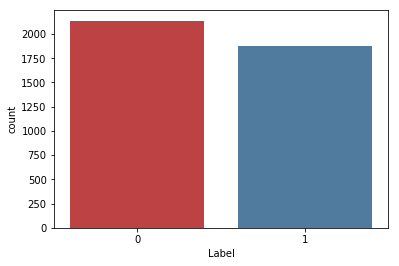

In [32]:
sns.countplot(x='Label', data=df_fake, saturation=0.6,palette="Set1")

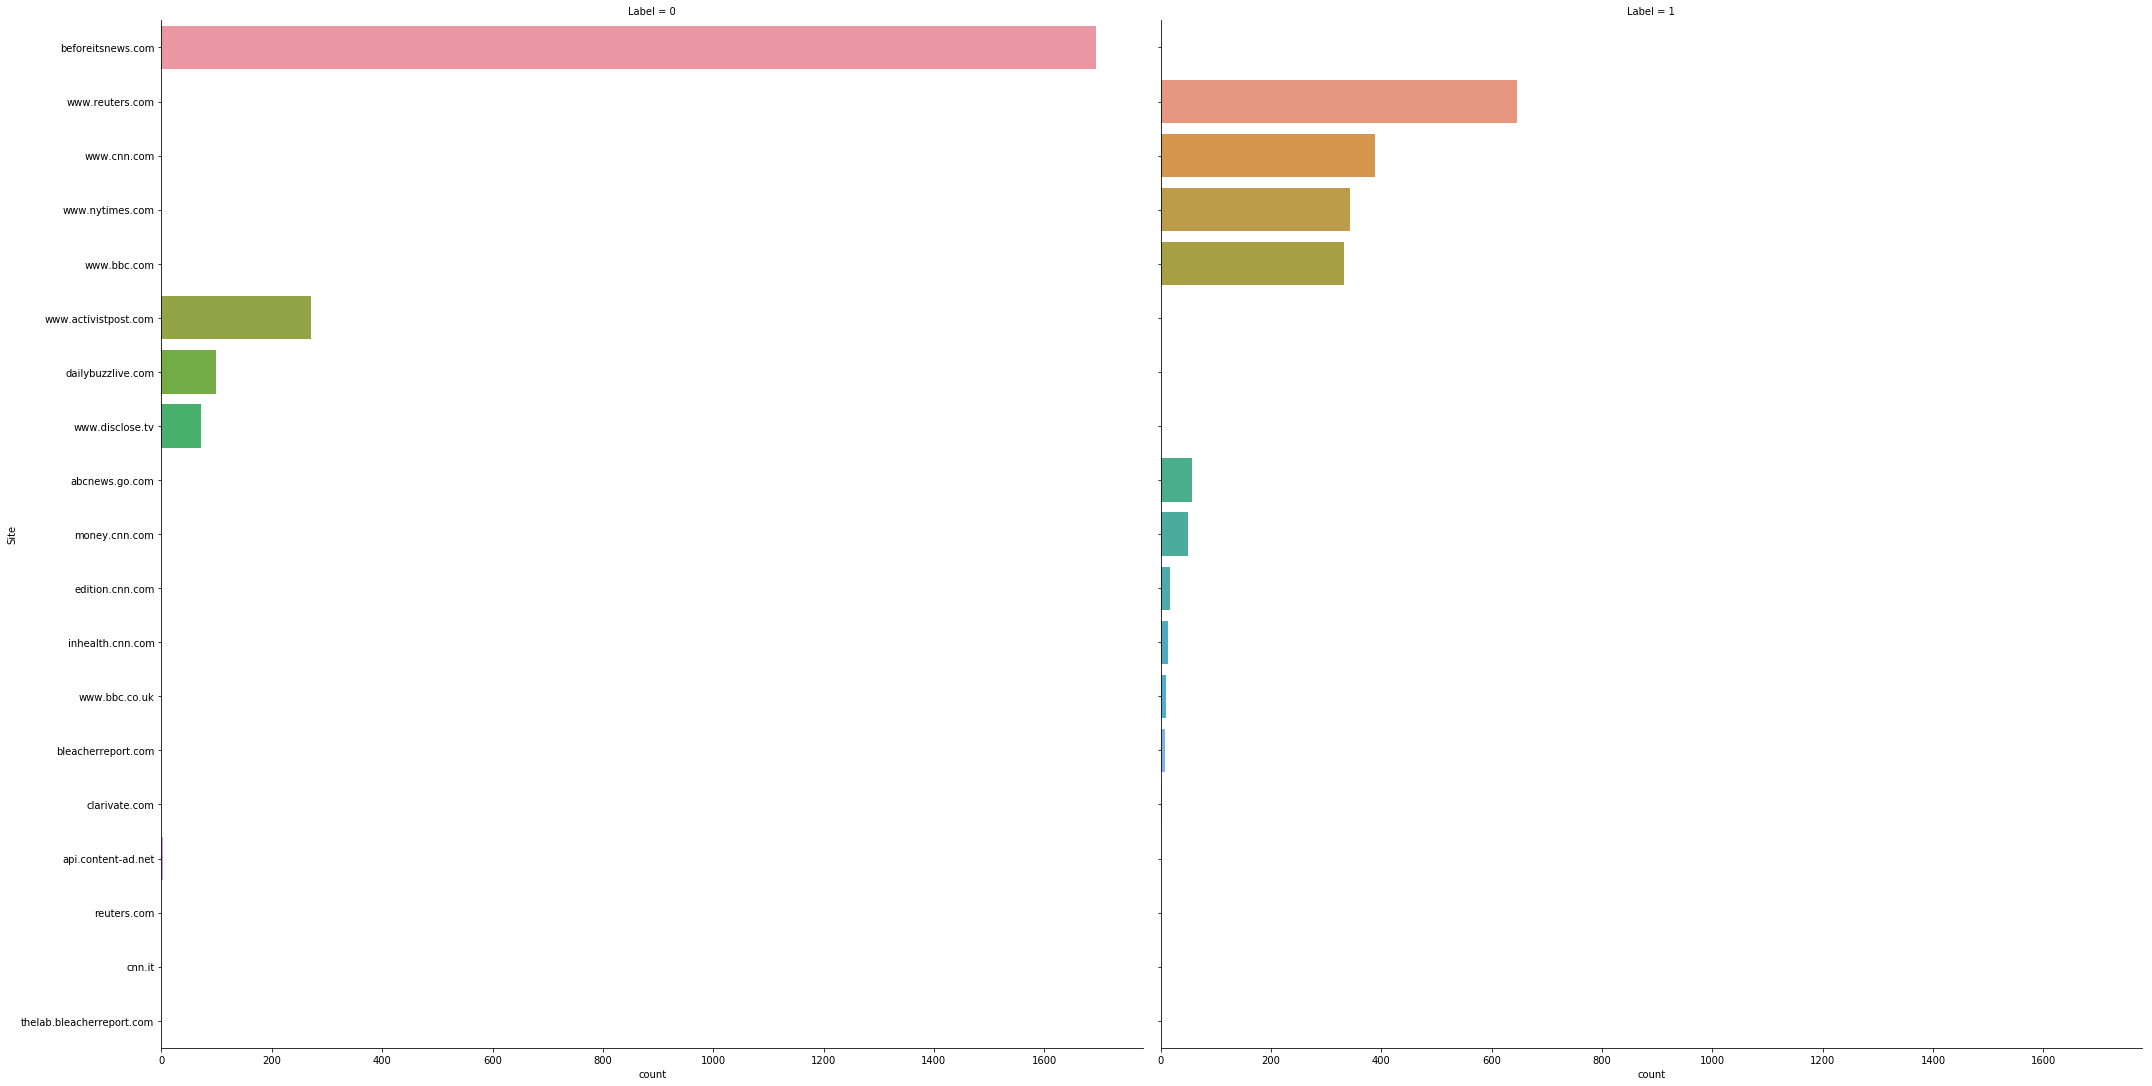

In [33]:
sns.catplot(y="Site", col="Label",data=df_fake,order=df_fake['Site'].value_counts().index , kind="count", height=15)

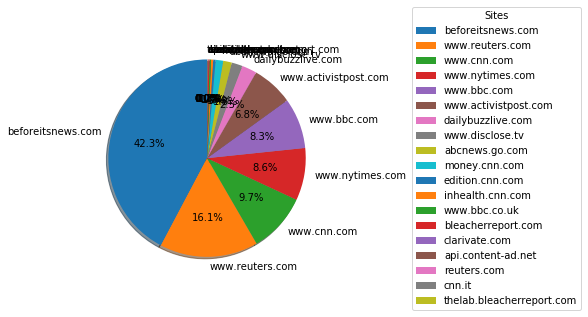

In [34]:
fig1, ax1 = plt.subplots()

slices = df_fake["Site"].value_counts()
labels = slices.index
ax1.pie(slices, autopct='%1.1f%%', labels=labels,shadow=True, startangle=90,)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc="center left", title="Sites",bbox_to_anchor=(1.1, 1, 0, -1))
plt.show()

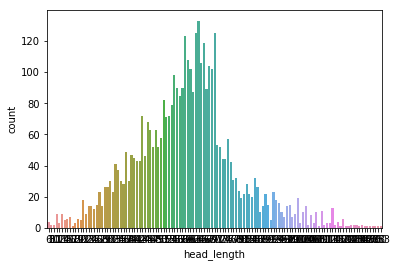

In [35]:
sns.countplot(x='head_length',data=df_fake)

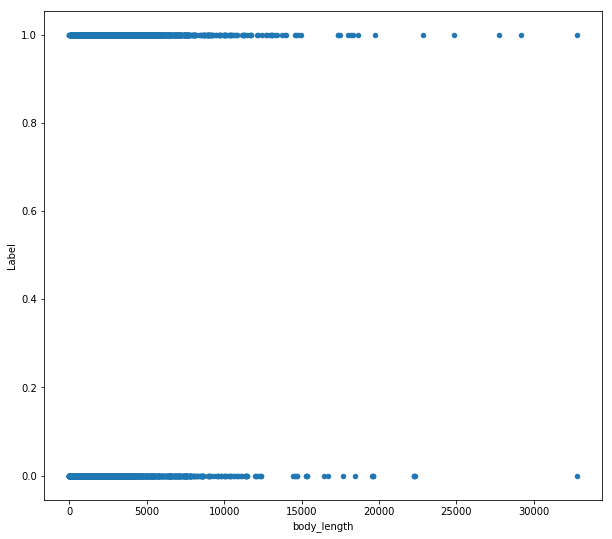

In [36]:
df_fake.plot(x='body_length', y='Label', figsize=(10,9),kind='scatter')

Plots of the body length and head with grouby of fake 

In [37]:
dfFake = df_fake[df_fake['Label']==False]
dfTrue = df_fake[df_fake['Label']==True]

In [38]:
dfFake['body_length'].mean()

2375.0706598034626

In [39]:
dfTrue['body_length'].mean()

3554.686965811966

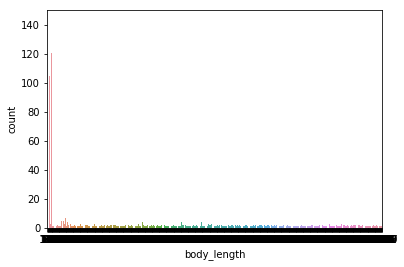

In [40]:
sns.countplot(x='body_length',data=dfFake)

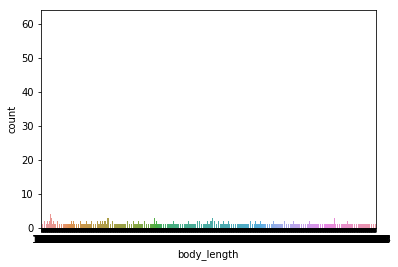

In [41]:
sns.countplot(x='body_length',data=dfTrue)

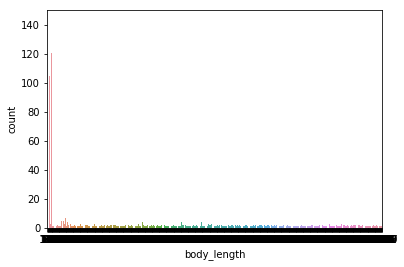

In [42]:
sns.countplot(x='body_length',data=dfFake)

C:\Users\shtay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


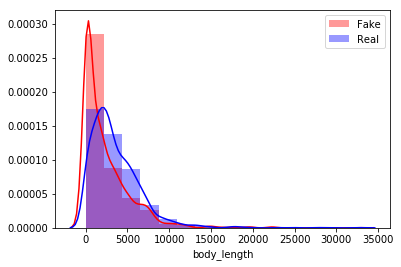

In [43]:
sns.distplot(dfFake['body_length'], bins=15, color="Red",label="Fake")
sns.distplot(dfTrue['body_length'], bins=15, color="Blue",label="Real")
plt.legend()

C:\Users\shtay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


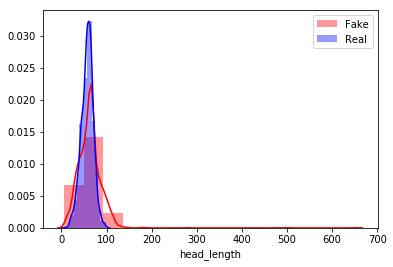

In [44]:
sns.distplot(dfFake['head_length'], bins=15, color="Red",label="Fake")
sns.distplot(dfTrue['head_length'], bins=15, color="Blue",label="Real")
plt.legend()

C:\Users\shtay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


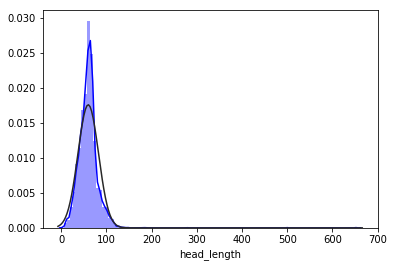

In [45]:
from scipy.stats import norm
sns.distplot(df_fake['head_length'], bins=100, color="Blue",fit=norm)

Exploring numerical features with histograms

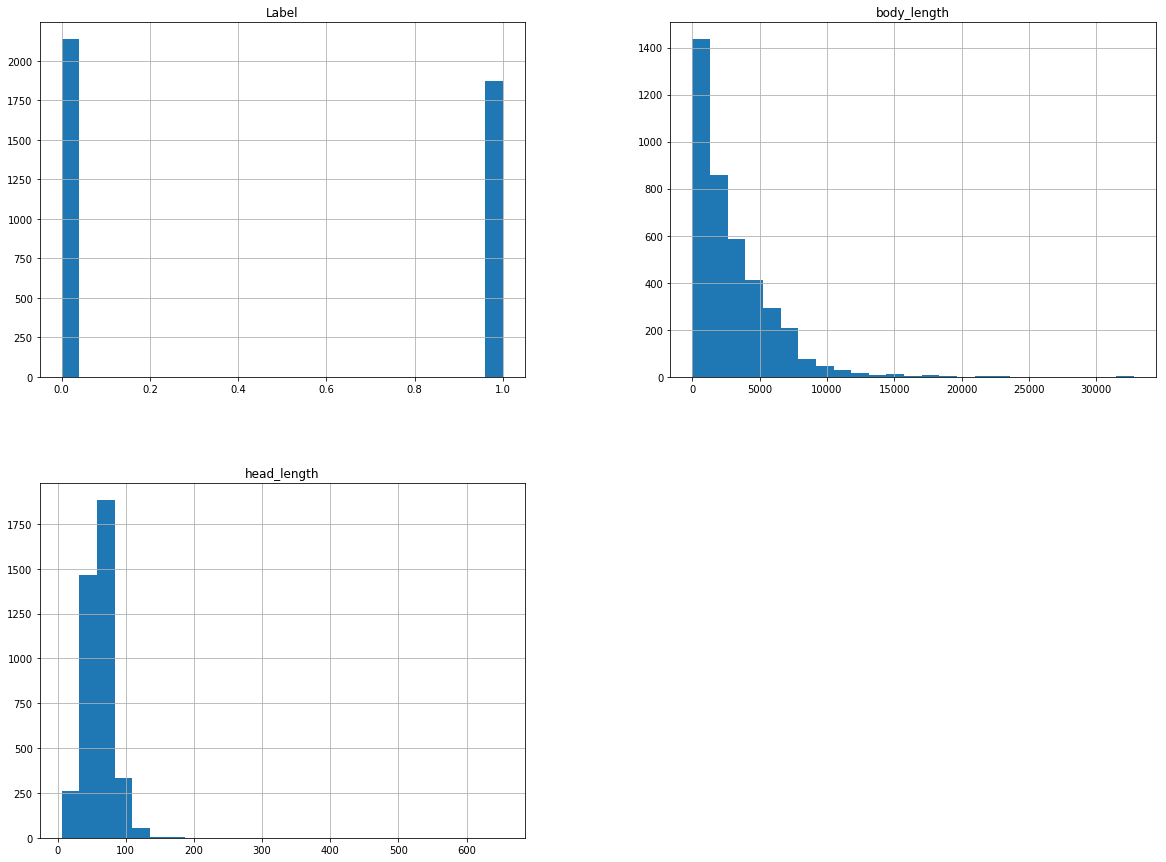

In [46]:
df_fake.hist(bins = 25, figsize = (20,15), column=["body_length","head_length","Label"]) 
plt.show()

C:\Users\shtay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


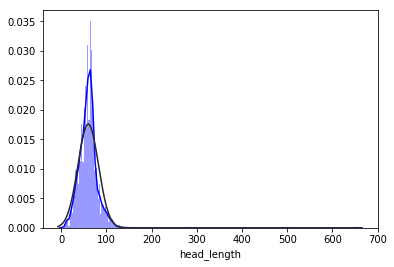

In [47]:
sns.distplot(df_fake['head_length'], bins=250, color="Blue", fit=norm)

Handling non normal distributions

In [48]:
df_fake['head_length'].describe()

count    4009.000000
mean       60.104016
std        22.660900
min         6.000000
25%        48.000000
50%        60.000000
75%        69.000000
max       653.000000
Name: head_length, dtype: float64

C:\Users\shtay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


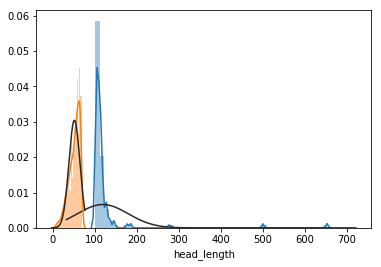

In [49]:
df_longhead = df_fake[df_fake["head_length"] > 100] 
df_shorthead = df_fake[df_fake["head_length"] <= 69] 
sns.distplot(df_longhead["head_length"], fit=norm)
sns.distplot(df_shorthead["head_length"], fit=norm)

In [50]:
len_head = np.clip(df_fake['head_length'], 30, 100 )

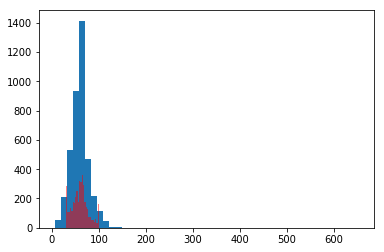

In [51]:
plt.hist(df_fake['head_length'], bins=50)
plt.hist(len_head, bins=25, color='red', alpha = 0.5)
plt.show()

3d Graph

Text(0.5,0.92,'Lengths Labels')

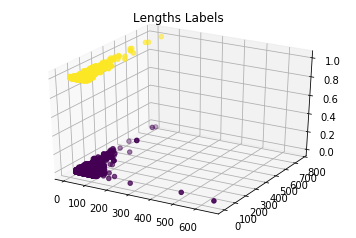

In [52]:
ax = plt.axes(projection='3d')
x= df_fake['head_length']
y= df_fake['body_length'] / x
z= df_fake['Label']
ax.scatter3D(x, y, z, c=z, cmap='viridis');
ax.set_title('Lengths Labels')

In [53]:
check = y / x
df_fake['check'] = check
df_fake['check']

0       3.634921
1       0.763315
2       1.827778
3       0.136246
4       0.115197
5       0.629883
6       2.597737
7       0.396267
8       0.806183
9       0.257647
10      0.389374
11      0.267012
12      2.471875
13      0.206005
14      0.022645
15      3.739796
16      1.814286
17      0.055899
18      0.030277
19      0.106934
20      0.041617
21      0.005861
22      0.274898
23      0.616941
24      0.027772
25      0.552686
26      0.030277
27      0.050454
28      3.277778
29      0.654900
          ...   
3979    0.013374
3980    0.759637
3981    2.036281
3982    0.023866
3983    0.151981
3984    0.103422
3985    0.909221
3986    2.287753
3987    0.071456
3988    0.428254
3989    2.095662
3990    0.596939
3991    1.062400
3992    0.583333
3993    0.020200
3994    2.323457
3995    3.076800
3996    1.216049
3997    1.069199
3998    0.008262
3999    0.846537
4000    0.368135
4001    1.042241
4002    0.107278
4003    0.027438
4004    8.146667
4005    0.118806
4006    0.0010

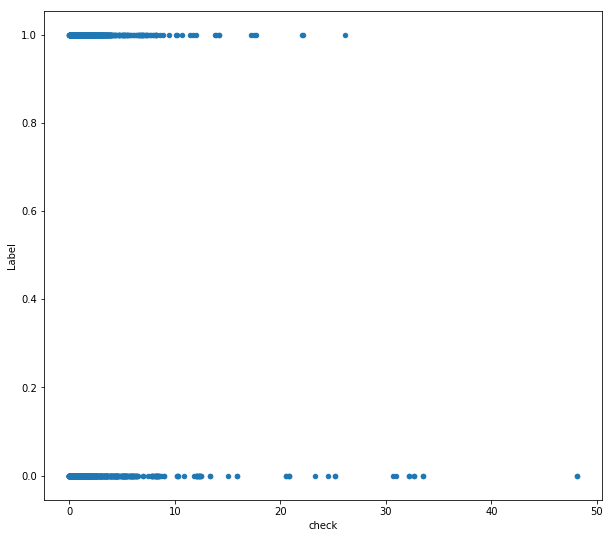

In [54]:
df_fake.plot(x='check', y='Label', figsize=(10,9),kind='scatter')

7. Checking if when there is no text in the body of the headline if its fake

In [55]:
##Setting a Variable which tells us if the headline has no Body text
Var_NoBody = df_fake.loc[df_fake['Body'] == 'NO']
Var_NoBody.count()

URLs           21
Headline       21
Body           21
Label          21
head_length    21
body_length    21
excla          21
excla_body     21
Trump          21
Week           21
2017           21
Vegas          21
Game           21
Football       21
Rankings       21
Fantasy        21
More           21
With           21
Ravens         21
Stories        21
Shooting       21
From           21
After          21
Video          21
Bucs           21
Will           21
Puerto         21
Jets           21
About          21
Steelers       21
President      21
White          21
This           21
new            21
Site           21
check          21
dtype: int64

In [56]:
df_fake['URLs'].loc[df_fake['Body']=='NO']

247     https://www.nytimes.com/interactive/2017/10/12...
269     https://www.nytimes.com/2017/10/10/magazine/th...
325     http://edition.cnn.com/interactive/2017/10/mid...
395     http://beforeitsnews.com/entertainment/2017/09...
509     http://beforeitsnews.com/sports/2017/10/105-tr...
882     http://beforeitsnews.com/sports/2017/10/103-ha...
973     http://beforeitsnews.com/sports/2017/10/ravens...
981     http://beforeitsnews.com/sports/2017/10/104-tr...
1006    https://www.activistpost.com/2017/09/scientist...
1133    http://beforeitsnews.com/sports/2017/10/106-hb...
1210    http://beforeitsnews.com/sports/2017/10/105-ex...
1500    http://beforeitsnews.com/u-s-politics/2017/09/...
1785    http://beforeitsnews.com/sports/2017/10/ravens...
2254    https://www.activistpost.com/2017/09/new-un-re...
2302    https://www.activistpost.com/2017/09/the-kurdi...
2709    http://beforeitsnews.com/sports/2017/10/106-po...
2959    http://beforeitsnews.com/sports/2017/10/103-ex...
3108    https:

In [57]:
Var_NoBody = Var_NoBody['Label'].mean()
Var_NoBody

0.19047619047619047

Meaning - 81% of the articles with no bodies are fake!

Checking to see if there is a connection between the word Trump and fake news

In [58]:
df_fake['Trump'] = df_fake['Headline'].str.contains('Trump')==True
df_fake['Trump'].value_counts()
df_fake['Trump'] = df_fake['Trump'].astype(int)

In [59]:
pd.crosstab(df_fake['Trump'], df_fake['Site'])

Site,abcnews.go.com,api.content-ad.net,beforeitsnews.com,bleacherreport.com,clarivate.com,cnn.it,dailybuzzlive.com,edition.cnn.com,inhealth.cnn.com,money.cnn.com,reuters.com,thelab.bleacherreport.com,www.activistpost.com,www.bbc.co.uk,www.bbc.com,www.cnn.com,www.disclose.tv,www.nytimes.com,www.reuters.com
Trump,,,,,,,,,,,,,,,,,,,
0,54,2,1500,8,3,1,98,16,14,38,1,1,252,10,306,312,69,306,599
1,3,0,194,0,0,0,1,0,0,11,0,0,19,0,27,77,2,38,47


C:\Users\shtay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shtay\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


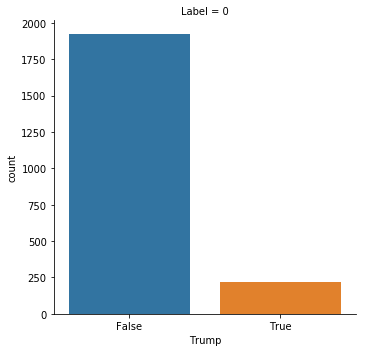

In [60]:
dfFake['Trump'] = dfFake['Headline'].str.contains('Trump')==True
dfTrue['Trump'] = dfTrue['Headline'].str.contains('Trump')==True
sns.catplot(x="Trump", col="Label",data=dfFake, kind="count", height=5)

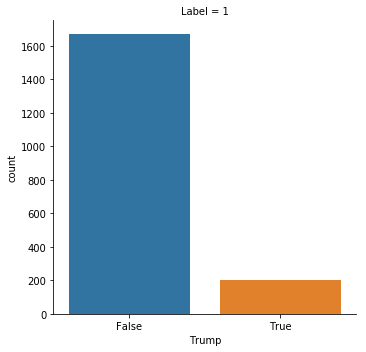

In [61]:
sns.catplot(x="Trump", col="Label",data=dfTrue, kind="count", height=5)

We can see that when using the word trump
there are almost the same results with fake / real data

Cross checking the various Columns with Label to see if there are relevant connections

In [62]:
excla_label = pd.crosstab(df_fake['excla'], df_fake['Label'])

In [63]:
excla_label

Label,0,1
excla,,
0,2040,1857
1,97,15


We can see clearly from the crosstab that when using "!" in the headlinee there is a 87% chance of it being fake

excla
0    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
1    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

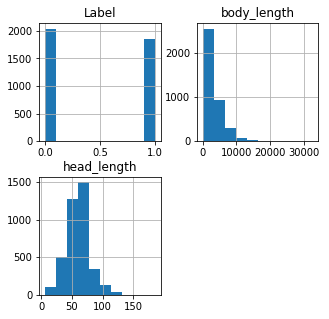

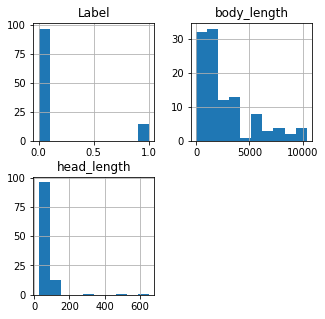

In [64]:
df_fake.groupby('excla').hist(bins = 10, figsize = (5,5), column=["Label", "body_length","head_length"])

excla
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

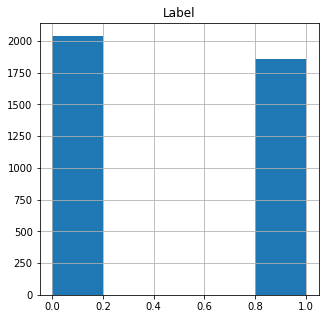

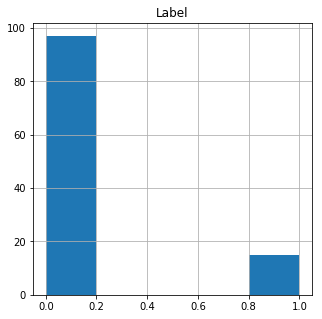

In [65]:
df_fake.groupby('excla').hist(bins = 5, figsize = (5,5), column=["Label"])

We can see quite clearly that when using "!" in the Headline 
most news are fake

In [66]:
pd.crosstab(df_fake['Site'], df_fake['Label'])

Label,0,1
Site,,
abcnews.go.com,0,57
api.content-ad.net,2,0
beforeitsnews.com,1694,0
bleacherreport.com,0,8
clarivate.com,0,3
cnn.it,0,1
dailybuzzlive.com,99,0
edition.cnn.com,0,16
inhealth.cnn.com,0,14


From the information from our Sites crosstab we see that from each site the data is either fake or not depending on the site-
therefore we cannot ascertain wether the data extraction was biased or the site is biased. 

We therfore need more data from those site

### Training our data

In [67]:
df_fortrain = df_fake.drop(columns=["URLs","Headline","Body","Site"])
df_fortrain['new'] = df_fortrain['new'].astype(int)
df_fortrain

,Label,head_length,body_length,excla,excla_body,Trump,Week,2017,Vegas,Game,...,Will,Puerto,Jets,About,Steelers,President,White,This,new,check
0,1,42,6412,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.634921
1,1,66,3325,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.763315
2,1,60,6580,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.827778
3,1,68,630,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.136246
4,1,43,213,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.115197
5,0,32,645,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.629883
6,1,54,7575,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.597737
7,1,75,2229,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.396267
8,1,58,2712,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.806183
9,1,73,1373,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.257647


In [68]:
train_df, test_df= train_test_split (df_fortrain, test_size = 0.2, random_state=7)

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3207 entries, 356 to 175
Data columns (total 32 columns):
Label          3207 non-null int64
head_length    3207 non-null int64
body_length    3207 non-null int64
excla          3207 non-null int32
excla_body     3207 non-null int32
Trump          3207 non-null int32
Week           3207 non-null int32
2017           3207 non-null int32
Vegas          3207 non-null int32
Game           3207 non-null int32
Football       3207 non-null int32
Rankings       3207 non-null int32
Fantasy        3207 non-null int32
More           3207 non-null int32
With           3207 non-null int32
Ravens         3207 non-null int32
Stories        3207 non-null int32
Shooting       3207 non-null int32
From           3207 non-null int32
After          3207 non-null int32
Video          3207 non-null int32
Bucs           3207 non-null int32
Will           3207 non-null int32
Puerto         3207 non-null int32
Jets           3207 non-null int32
About          32

In [70]:
train_df.describe()

,Label,head_length,body_length,excla,excla_body,Trump,Week,2017,Vegas,Game,...,Will,Puerto,Jets,About,Steelers,President,White,This,new,check
count,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,...,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000
mean,0.468974,60.345806,2927.597755,0.030558,0.030558,0.103835,0.041472,0.043031,0.036795,0.033365,...,0.015591,0.016215,0.009355,0.011849,0.010602,0.014344,0.014655,0.011537,0.013096,1.288909
std,0.499114,23.369416,3065.187508,0.172144,0.172144,0.305094,0.199410,0.202958,0.188286,0.179615,...,0.123906,0.126319,0.096280,0.108224,0.102434,0.118921,0.120188,0.106807,0.113705,2.835588
min,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000165
25%,0.000000,48.000000,523.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160144
50%,0.000000,60.000000,2105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597015
75%,1.000000,69.000000,4295.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.279853
max,1.000000,653.000000,32767.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.088889


In [71]:
train_df_numeric = train_df.iloc[:, 0:11] 
corr_df=train_df_numeric.corr()
corr_df

,Label,head_length,body_length,excla,excla_body,Trump,Week,2017,Vegas,Game,Football
Label,1.000000,-0.111355,0.191255,-0.123284,-0.123284,0.016042,-0.179805,-0.143853,-0.014401,-0.143279,-0.118290
head_length,-0.111355,1.000000,0.032347,0.111736,0.111736,0.015961,-0.061110,-0.004914,0.143986,0.076539,-0.013443
body_length,0.191255,0.032347,1.000000,-0.025342,-0.025342,-0.074116,-0.002889,-0.041155,0.037916,-0.050239,-0.074377
excla,-0.123284,0.111736,-0.025342,1.000000,1.000000,-0.030739,-0.036930,-0.010865,0.023040,-0.032985,-0.027097
excla_body,-0.123284,0.111736,-0.025342,1.000000,1.000000,-0.030739,-0.036930,-0.010865,0.023040,-0.032985,-0.027097
Trump,0.016042,0.015961,-0.074116,-0.030739,-0.030739,1.000000,-0.050296,0.023528,-0.012231,-0.046164,-0.051951
Week,-0.179805,-0.061110,-0.002889,-0.036930,-0.036930,-0.050296,1.000000,0.580156,-0.040654,0.031025,0.503041
2017,-0.143853,-0.004914,-0.041155,-0.010865,-0.010865,0.023528,0.580156,1.000000,-0.033283,-0.022283,0.410652
Vegas,-0.014401,0.143986,0.037916,0.023040,0.023040,-0.012231,-0.040654,-0.033283,1.000000,-0.027088,-0.029829
Game,-0.143279,0.076539,-0.050239,-0.032985,-0.032985,-0.046164,0.031025,-0.022283,-0.027088,1.000000,-0.005071


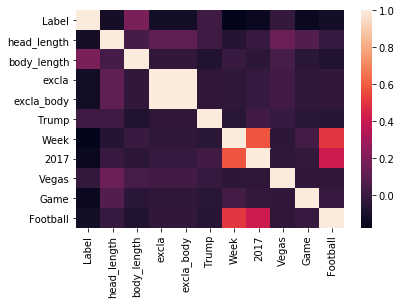

In [72]:
sns.heatmap(corr_df)

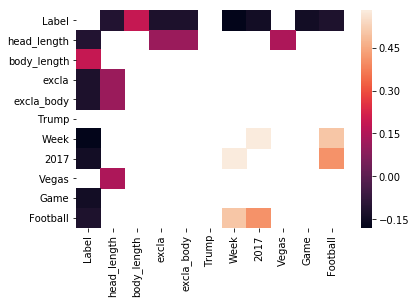

In [73]:
sns.heatmap(corr_df[(corr_df<1) & ((corr_df >= 0.1) | (corr_df <= -0.1)) ] )

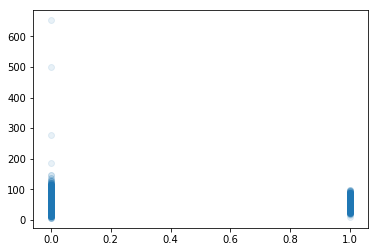

In [74]:
plt.scatter(data = train_df, x="Label", y="head_length", alpha=0.1)

C:\Users\shtay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


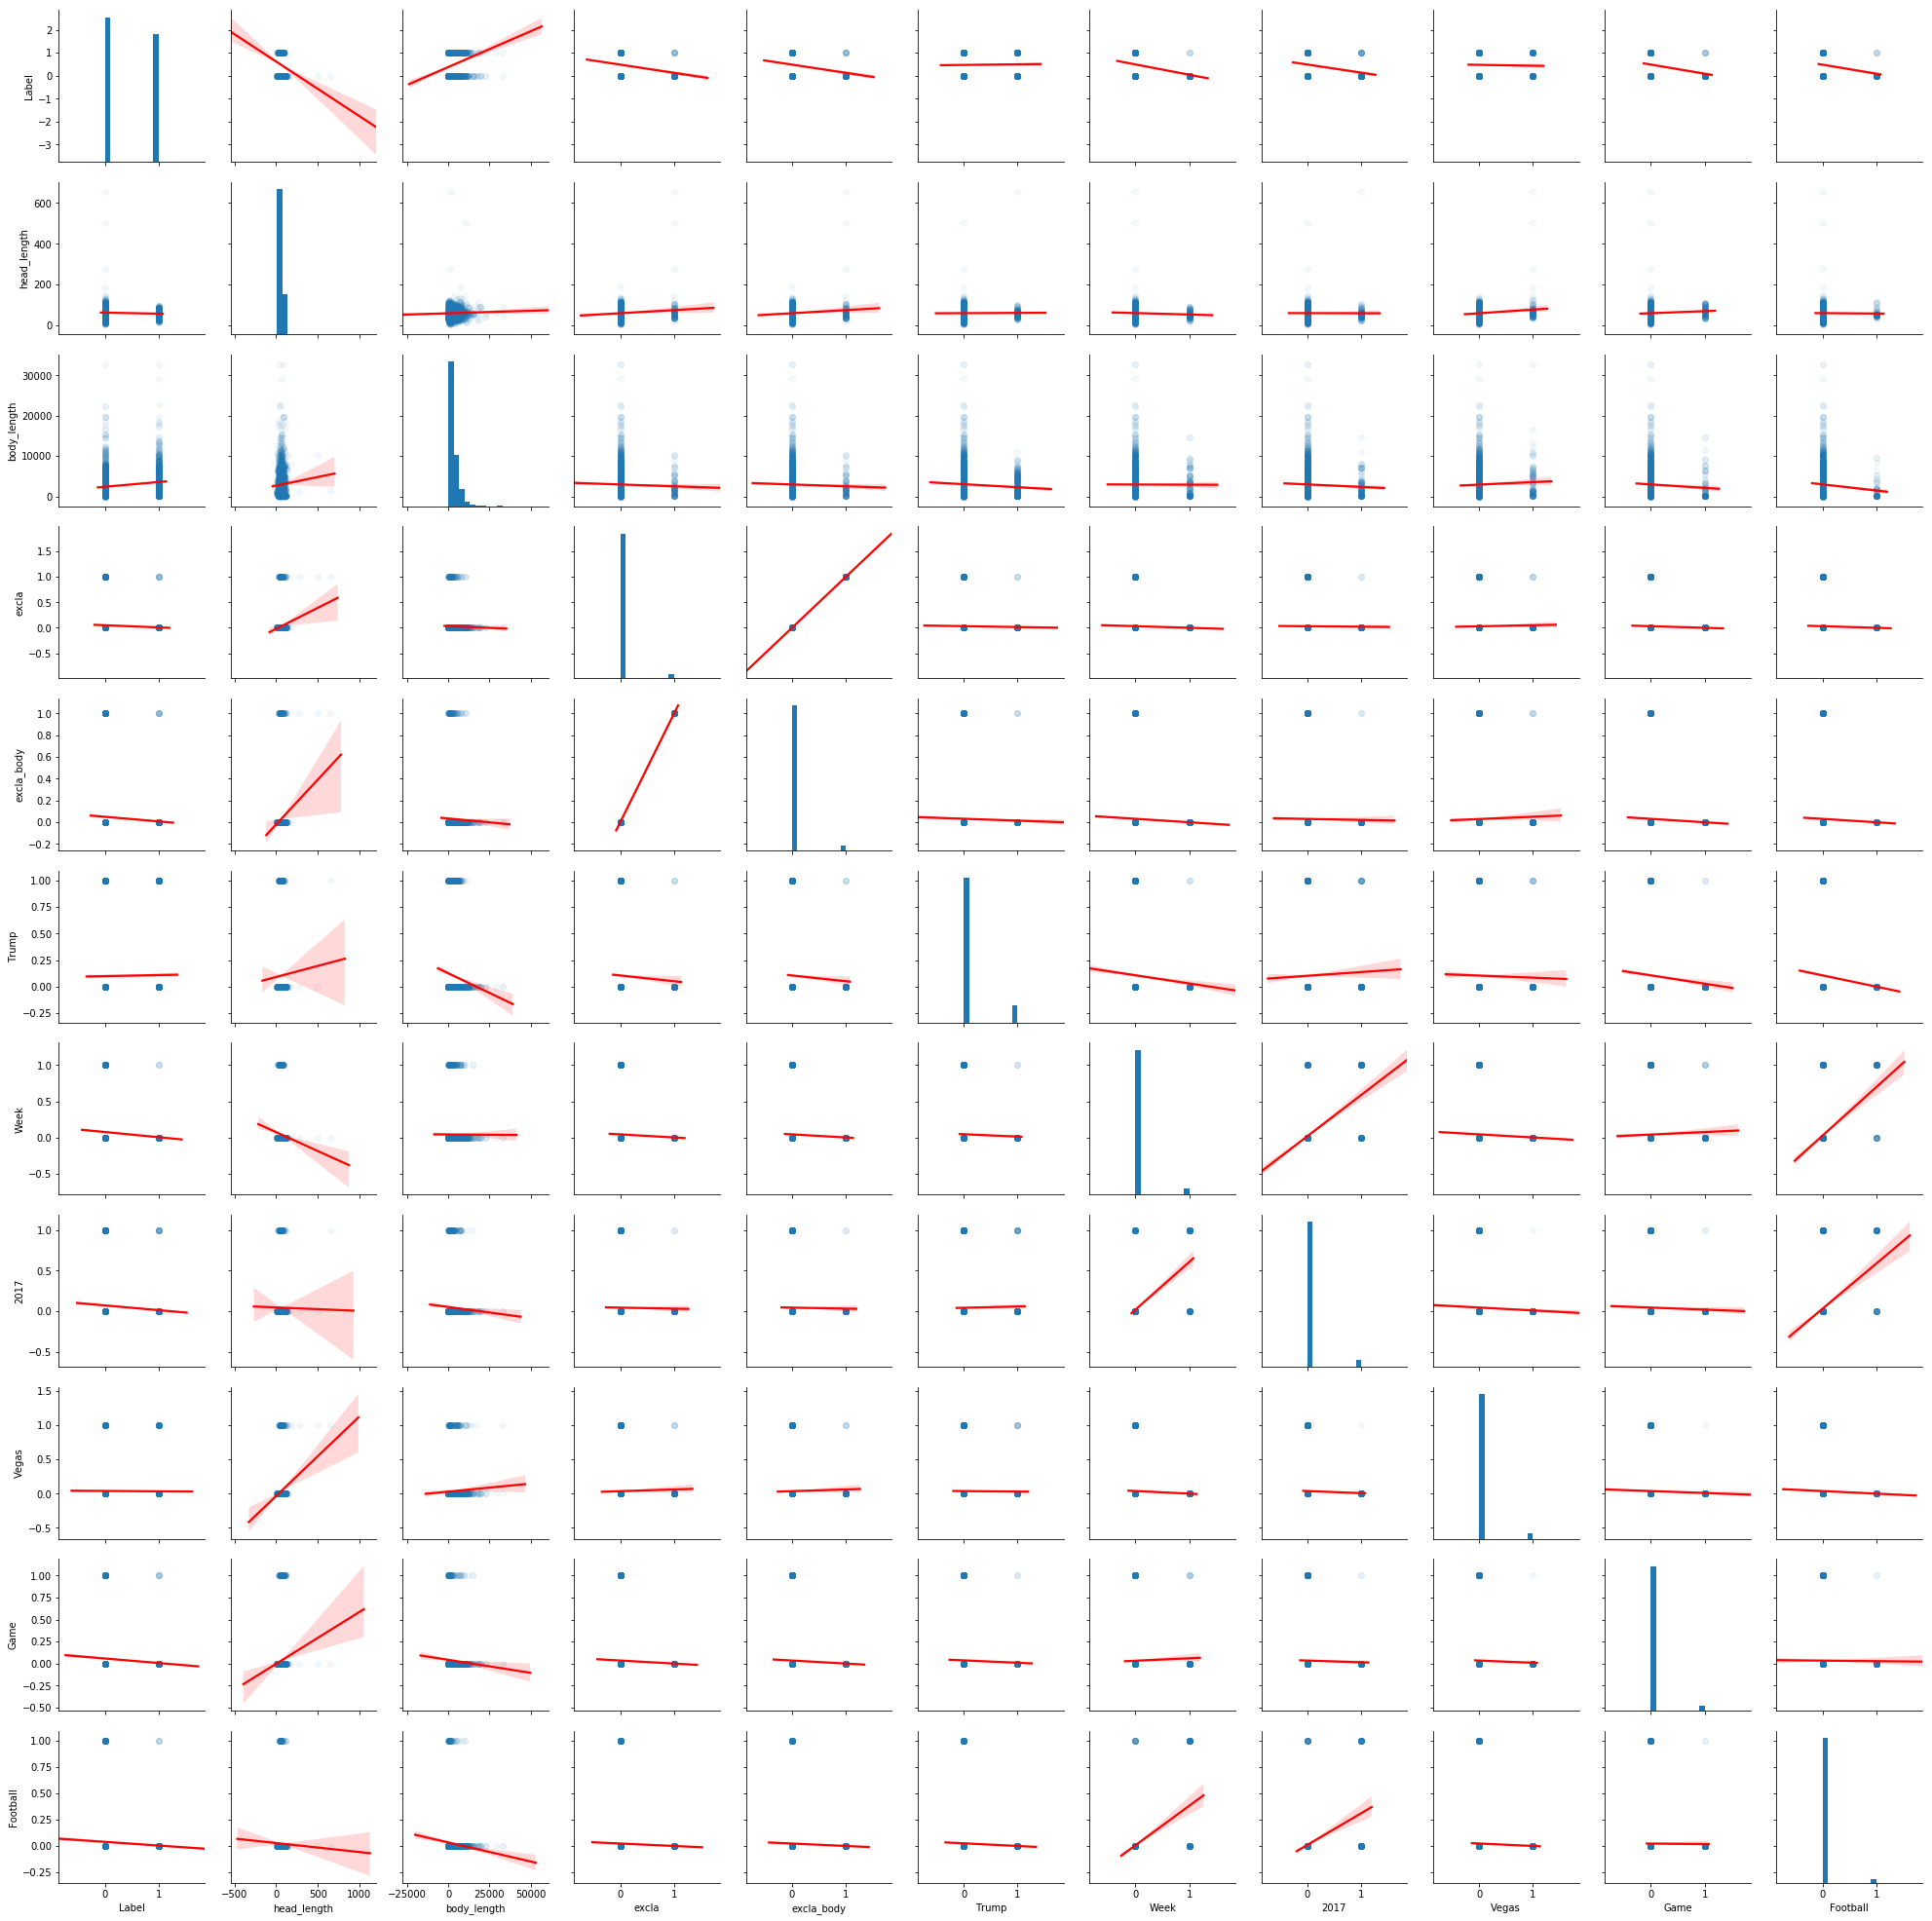

In [75]:
sns.pairplot(train_df_numeric, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}})

In [76]:
pd.crosstab(train_df['Label'], train_df['new'], margins=True)

new,0,1,All
Label,,,
0,1700,3,1703
1,1465,39,1504
All,3165,42,3207


Label
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

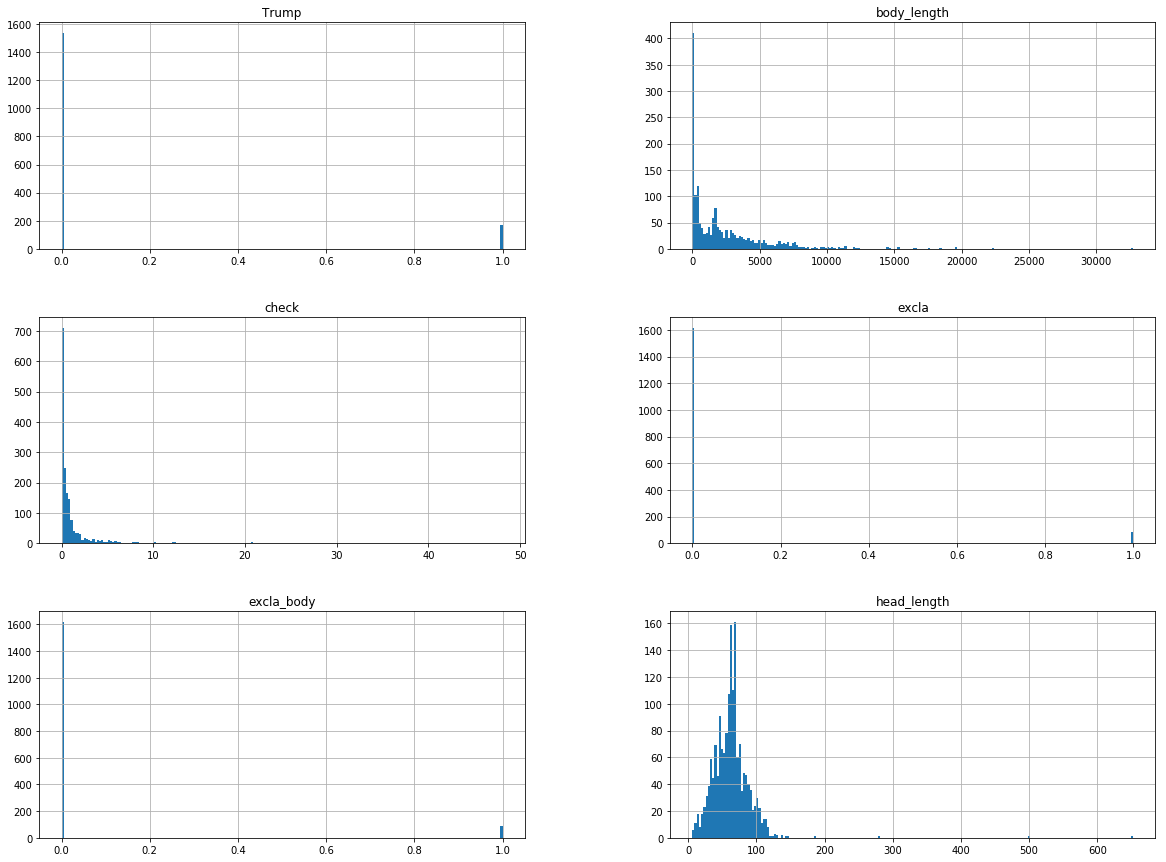

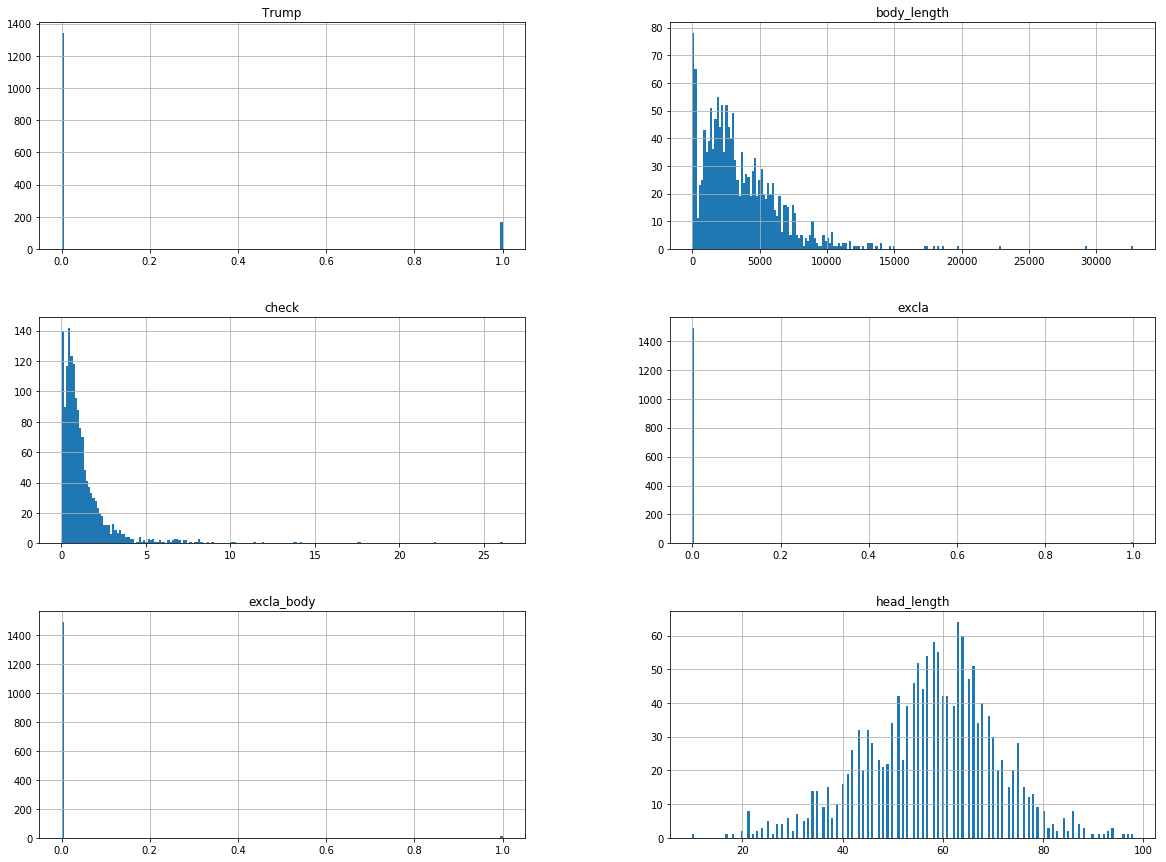

In [77]:
train_df.groupby(['Label']).hist(bins = 200, figsize = (20,15), column=["head_length", "body_length", "excla", "check", "Trump", "excla_body"])

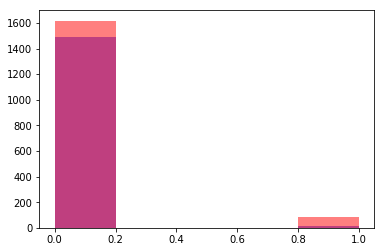

In [78]:
plt.hist(train_df[train_df["Label"] ==1]["excla"], bins=5, color='blue', alpha = 0.5)
plt.hist(train_df[train_df["Label"] ==0]["excla"], bins=5, color='red', alpha = 0.5)
plt.show()

### Standardizing our data

In [79]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [80]:
train_df_std = stdsc.fit_transform(train_df)
test_df_std = stdsc.transform(test_df)

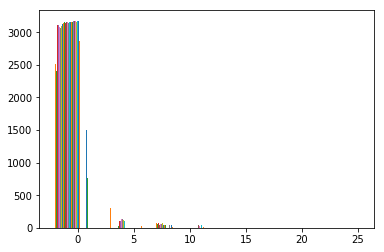

In [81]:
plt.hist(train_df_std)
plt.show()

### Wrapping up and saving our prepared Data

In [391]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [82]:
import pickle

In [83]:
pickle.dump(train_df, open("train_df.dat", "wb")) # wb = write binary

In [84]:
train_df_read = pickle.load(open("train_df.dat", "rb"))

In [85]:
train_df_read.describe()

,Label,head_length,body_length,excla,excla_body,Trump,Week,2017,Vegas,Game,...,Will,Puerto,Jets,About,Steelers,President,White,This,new,check
count,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,...,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000
mean,0.468974,60.345806,2927.597755,0.030558,0.030558,0.103835,0.041472,0.043031,0.036795,0.033365,...,0.015591,0.016215,0.009355,0.011849,0.010602,0.014344,0.014655,0.011537,0.013096,1.288909
std,0.499114,23.369416,3065.187508,0.172144,0.172144,0.305094,0.199410,0.202958,0.188286,0.179615,...,0.123906,0.126319,0.096280,0.108224,0.102434,0.118921,0.120188,0.106807,0.113705,2.835588
min,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000165
25%,0.000000,48.000000,523.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160144
50%,0.000000,60.000000,2105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597015
75%,1.000000,69.000000,4295.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.279853
max,1.000000,653.000000,32767.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.088889


In [86]:
pickle.dump(test_df, open("test_df.dat", "wb"))
pickle.dump(train_df_std, open("train_df_std.dat", "wb"))
pickle.dump(test_df_std, open("test_df_std.dat", "wb"))

### Reading our prepared Data

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import pickle

In [2]:
train_df = pickle.load(open("train_df.dat", "rb")) #note to call the file from correct folder
test_df = pickle.load(open("test_df.dat", "rb"))

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3207 entries, 356 to 175
Data columns (total 32 columns):
Label          3207 non-null int64
head_length    3207 non-null int64
body_length    3207 non-null int64
excla          3207 non-null int32
excla_body     3207 non-null int32
Trump          3207 non-null int32
Week           3207 non-null int32
2017           3207 non-null int32
Vegas          3207 non-null int32
Game           3207 non-null int32
Football       3207 non-null int32
Rankings       3207 non-null int32
Fantasy        3207 non-null int32
More           3207 non-null int32
With           3207 non-null int32
Ravens         3207 non-null int32
Stories        3207 non-null int32
Shooting       3207 non-null int32
From           3207 non-null int32
After          3207 non-null int32
Video          3207 non-null int32
Bucs           3207 non-null int32
Will           3207 non-null int32
Puerto         3207 non-null int32
Jets           3207 non-null int32
About          32

In [4]:
test_df.describe()

,Label,head_length,body_length,excla,excla_body,Trump,Week,2017,Vegas,Game,...,Will,Puerto,Jets,About,Steelers,President,White,This,new,check
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,...,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,0.458853,59.137157,2919.069825,0.017456,0.017456,0.107232,0.053616,0.049875,0.042394,0.026185,...,0.017456,0.026185,0.013716,0.011222,0.016209,0.012469,0.013716,0.006234,0.011222,1.326640
std,0.498615,19.556408,3118.693732,0.131046,0.131046,0.309601,0.225399,0.217823,0.201612,0.159783,...,0.131046,0.159783,0.116381,0.105403,0.126359,0.111035,0.116381,0.078761,0.105403,2.478857
min,0.000000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000154
25%,0.000000,46.000000,491.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170083
50%,0.000000,60.000000,2071.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.576300
75%,1.000000,69.000000,4339.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.435596
max,1.000000,178.000000,27763.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.132231


In [5]:
y = train_df["Label"]
X = train_df.drop("Label", axis = 1)
X2 = train_df[["head_length","body_length"]]
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3207 entries, 356 to 175
Data columns (total 2 columns):
head_length    3207 non-null int64
body_length    3207 non-null int64
dtypes: int64(2)
memory usage: 75.2 KB


In [6]:
from sklearn.model_selection import train_test_split
labels = train_df.pop('Label')
x_train, x_test, y_train, y_test = train_test_split(train_df ,labels, test_size = 0.25)


In [7]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

C:\Users\shtay\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7832432466131758

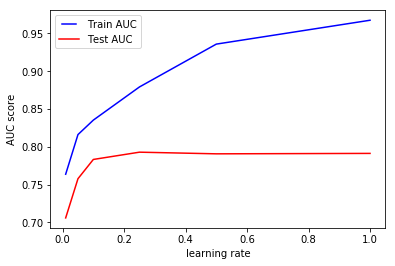

In [8]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

Optimal learning rate of - 0.05

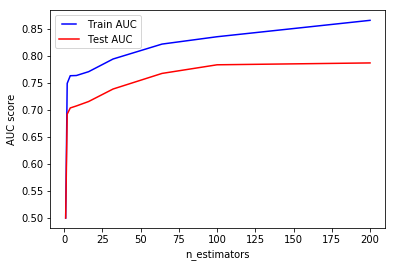

In [9]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

n_estimator of 32 is optimal

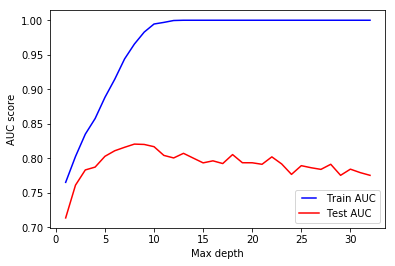

In [10]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results,'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max depth')
plt.show()

best fitting max depth = 5

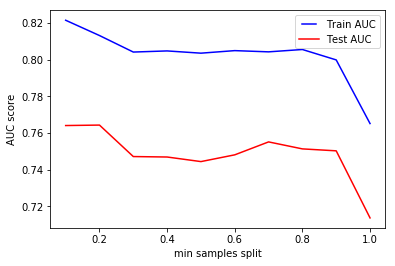

In [11]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results,'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

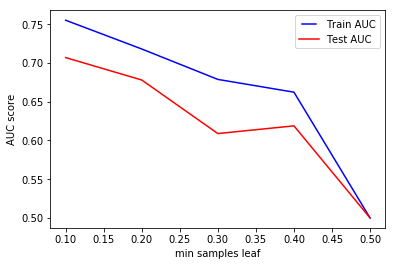

In [12]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

0.1 is best

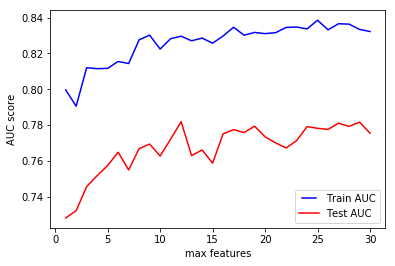

In [13]:
max_features = list(range(1,train_df.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

max features = 15 is best

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier (max_depth = 2)

tree_clf.fit (X2, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
from sklearn.tree import export_graphviz
import graphviz

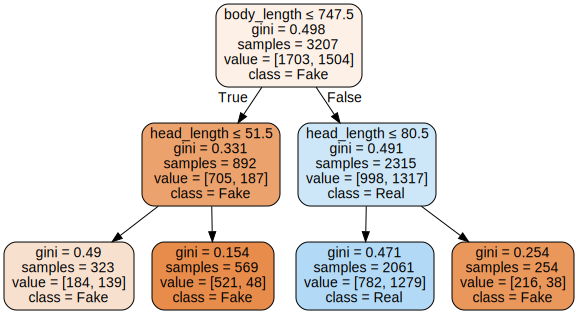

In [16]:
dot_data = export_graphviz(tree_clf, out_file = None, 
                           feature_names = ["head_length", "body_length" ], 
                           class_names = ["Fake", "Real" ],
                           rounded = True,max_depth=5, filled=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

In [17]:
tree_clf.predict([[100,100]])

array([0], dtype=int64)

In [19]:
tree_clf_large = DecisionTreeClassifier ()
tree_clf_large.fit (X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

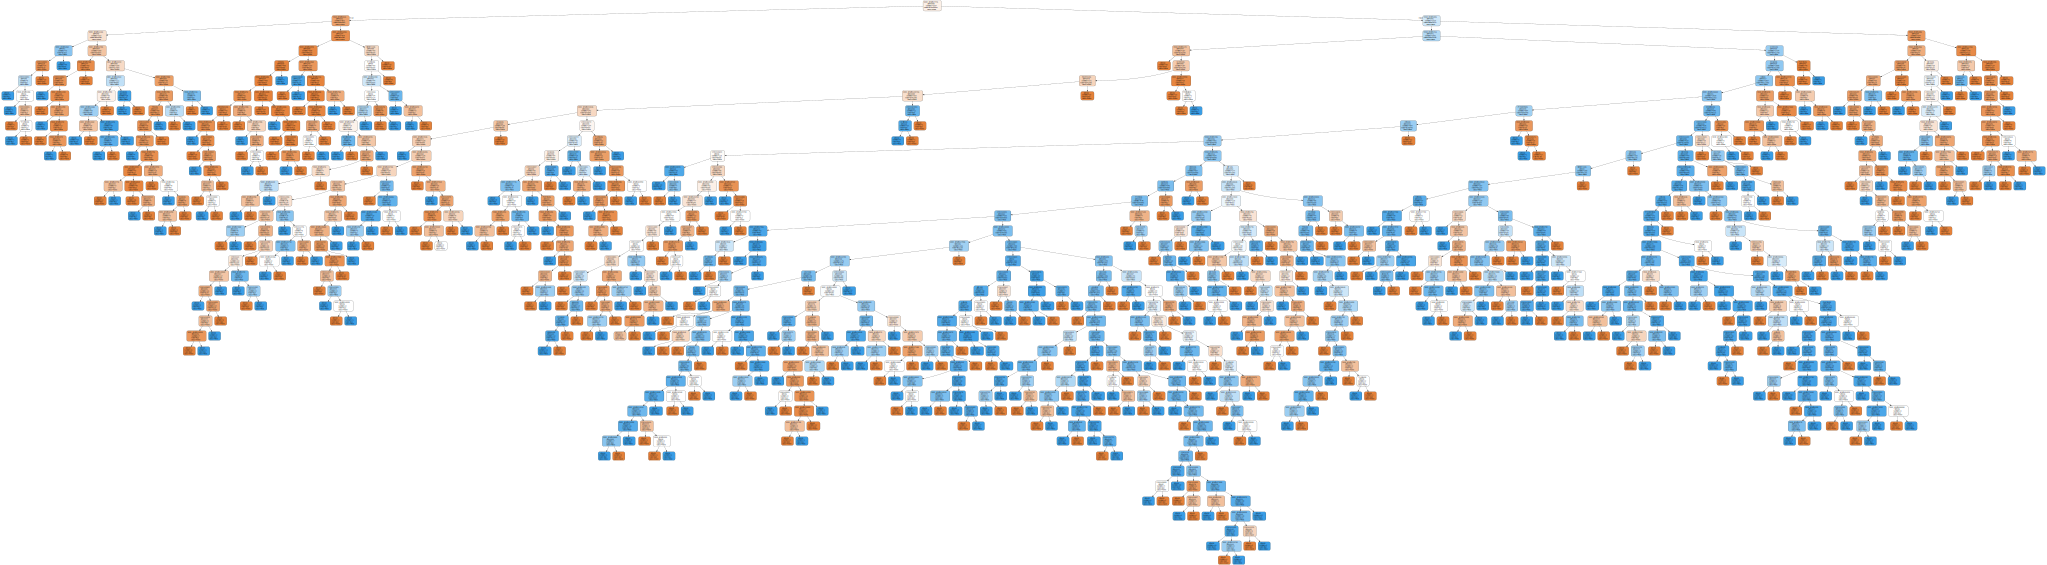

In [20]:
dot_data = export_graphviz(tree_clf_large, out_file = None, 
                           feature_names = list(X), 
                           class_names = ["Fake", "Real" ],
                           rounded = True, filled=True, special_characters=True)
graph = graphviz.Source(dot_data ) 
graph 

### Evaluating Classifications

In [21]:
y_test = test_df["Label"]
X_test = test_df.drop("Label", axis = 1)
X2_test = test_df[["head_length", "body_length"]]

In [22]:
y2_test_predict = tree_clf.predict (X2_test)

In [23]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y2_test_predict)
conf_matrix

array([[229, 205],
       [ 67, 301]], dtype=int64)

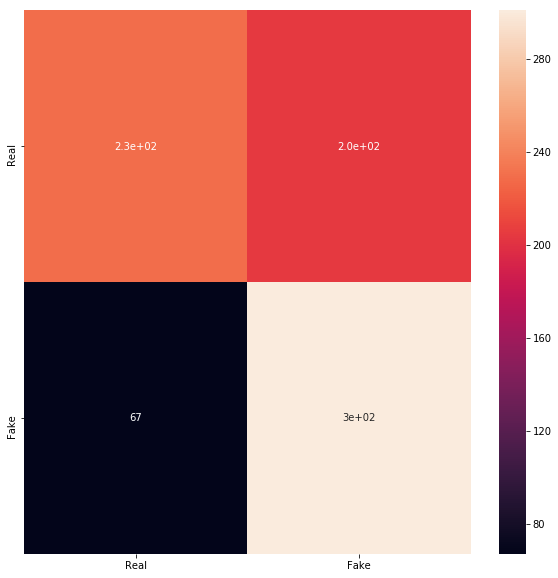

In [24]:
df_cm = pd.DataFrame(conf_matrix, index = [i for i in ["Real","Fake"]],
                  columns = [i for i in ["Real","Fake"]])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

In [25]:
confusion_matrix(y, tree_clf.predict (X2))

array([[ 921,  782],
       [ 225, 1279]], dtype=int64)

In [26]:
y_test_predict = tree_clf_large.predict (X_test)

In [27]:
confusion_matrix(y_test, y_test_predict)

array([[369,  65],
       [ 79, 289]], dtype=int64)

### Calculating Percision and Recall

In [28]:
from sklearn.metrics import precision_score, recall_score

print("The recall for the small tree is ",recall_score(y_test, y2_test_predict)) #small tree
print("The recall for the large tree is ",recall_score(y_test, y_test_predict))  #large tree
print("The precision for the small tree is ",precision_score(y_test, y2_test_predict)) #small tree
print("The precision for the large tree is ",precision_score(y_test, y_test_predict))  #large tree

The recall for the small tree is  0.8179347826086957
The recall for the large tree is  0.7853260869565217
The precision for the small tree is  0.5948616600790514
The precision for the large tree is  0.8163841807909604


## Selecting a threshold per recall and precision

In [29]:
y2_test_proba = tree_clf.predict_proba(X2_test)
y2_test_proba[:,1]

array([0.62057254, 0.62057254, 0.1496063 , 0.62057254, 0.62057254,
       0.62057254, 0.08435852, 0.08435852, 0.62057254, 0.62057254,
       0.43034056, 0.62057254, 0.62057254, 0.62057254, 0.62057254,
       0.62057254, 0.62057254, 0.62057254, 0.62057254, 0.62057254,
       0.08435852, 0.08435852, 0.62057254, 0.08435852, 0.43034056,
       0.62057254, 0.62057254, 0.43034056, 0.43034056, 0.1496063 ,
       0.62057254, 0.62057254, 0.08435852, 0.62057254, 0.43034056,
       0.1496063 , 0.08435852, 0.62057254, 0.62057254, 0.62057254,
       0.62057254, 0.43034056, 0.08435852, 0.08435852, 0.62057254,
       0.08435852, 0.1496063 , 0.43034056, 0.08435852, 0.62057254,
       0.62057254, 0.62057254, 0.62057254, 0.43034056, 0.08435852,
       0.62057254, 0.43034056, 0.08435852, 0.62057254, 0.08435852,
       0.62057254, 0.62057254, 0.62057254, 0.62057254, 0.62057254,
       0.1496063 , 0.43034056, 0.08435852, 0.43034056, 0.62057254,
       0.08435852, 0.62057254, 0.62057254, 0.62057254, 0.62057

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = y_test, probas_pred = y2_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

 Precision =  [0.45885287 0.54642314 0.58375635 0.59486166 1.        ] 
 Recalls =  [1.         0.97554348 0.9375     0.81793478 0.        ] 
 Thresholds =  [0.08435852 0.1496063  0.43034056 0.62057254]


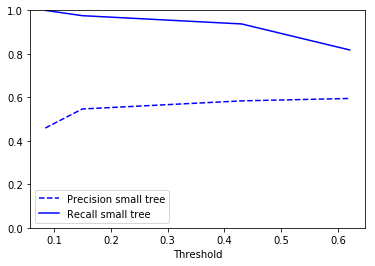

In [31]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="small tree")
plt.legend(loc = "best")
plt.show()

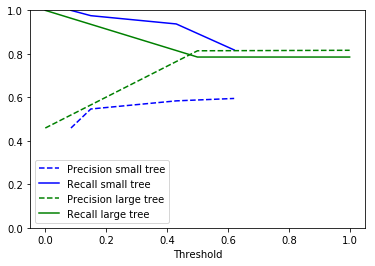

In [32]:
y_test_proba = tree_clf_large.predict_proba(X_test)
precisions_large, recalls_large, thresholds_large = precision_recall_curve(y_true = y_test, probas_pred = y_test_proba[:,1])
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="small tree")
plot_precision_recall_vs_threshold( precisions_large, recalls_large, thresholds_large, color = "g", label="large tree")
plt.legend(loc = "best")
plt.show()

## Comparing AUC & ROC curves

In [33]:
from sklearn.metrics import roc_curve

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y2_test_proba[:,1])

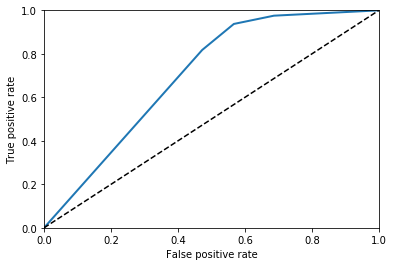

In [35]:
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve (fpr, tpr, "small tree")
plt.show()

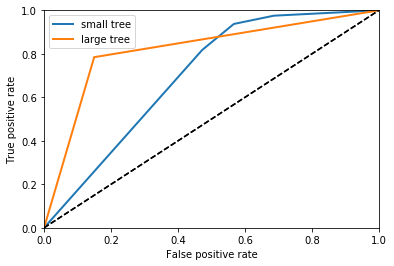

In [36]:
y_test_proba = tree_clf_large.predict_proba(X_test)
fpr_large, tpr_large, thresholds_large = roc_curve(y_test, y_test_proba[:,1])
plot_roc_curve (fpr, tpr, "small tree")
plot_roc_curve (fpr_large, tpr_large, "large tree")
plt.legend(loc = "best")
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
print("AUC for random guess is:   ", 0.5 )
print("AUC for the small tree is: ", roc_auc_score(y_test, y2_test_proba[:,1]) )
print("AUC for the large tree is: ", roc_auc_score(y_test, y_test_proba[:,1]) )

AUC for random guess is:    0.5
AUC for the small tree is:  0.7002322931276298
AUC for the large tree is:  0.8175309306752154


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 40, max_features=15)
rnd_clf.fit (X, y)
y_pred_rf = rnd_clf.predict(X_test)

In [72]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 50, max_depth =8)
rnd_clf.fit (X, y)
y_pred_rf = rnd_clf.predict(X_test)

In [73]:
confusion_matrix(y_test, y_pred_rf)

array([[301, 133],
       [ 49, 319]], dtype=int64)

In [74]:
recall_score(y_test, y_pred_rf)

0.8668478260869565

In [75]:
precision_score(y_test, y_pred_rf)

0.7057522123893806

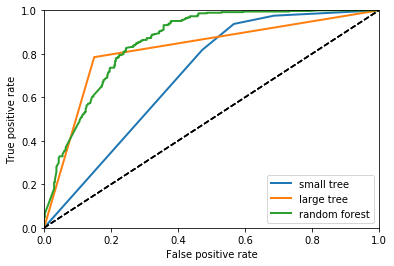

In [76]:
y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "small tree")
plot_roc_curve (fpr_large, tpr_large, "large tree")
plot_roc_curve (fpr_rf, tpr_rf, "random forest")
plt.legend(loc = "best")
plt.show()

In [77]:
roc_auc_score(y_test, y_rf_proba[:,1])

0.8578347275095172

In [45]:
roc_auc_score(y_test, y_gb_proba[:,1])

NameError: name 'y_gb_proba' is not defined

In [68]:
from sklearn.model_selection import GridSearchCV

param_n_estimators_range = [10, 20, 40,50]
param_max_depth_range =  [2, 3, 4, 5,10,15,20,25] 
param_max_features_range = [1,2,4,6,12,16,25,32]

param_grid = [{'n_estimators': param_n_estimators_range, 'max_depth':param_max_depth_range,'max_features':param_max_features_range},
              {'n_estimators': param_n_estimators_range, 'max_depth':param_max_depth_range,'max_features':param_max_features_range, 'bootstrap': ['False']}]

In [69]:
from sklearn.ensemble import RandomForestRegressor 

In [70]:
gs = GridSearchCV (estimator=RandomForestRegressor(), param_grid = param_grid, cv=10)

In [71]:
gs = gs.fit (X=x_train, y=y_train.ravel())

ValueError: max_features must be in (0, n_features]

In [ ]:
print ('The best score is:', gs.best_score_, '\nThe best parameters are:', gs.best_params_)

In [51]:
from sklearn.model_selection import validation_curve

param_range = [1, 2, 3, 4, 5, 8, 16, 32]     #These are the examined values to max_depth
train_scores, test_scores = validation_curve (estimator=RandomForestRegressor(n_estimators=50), 
                                              X=x_train, y=y_train.ravel(), 
                                              param_name='max_depth', param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1) # Vector of average scores
test_mean  = np.mean(test_scores, axis=1)
train_std  = np.std (train_scores, axis=1) # Vector of standard derivation
test_std   = np.std (test_scores, axis=1)

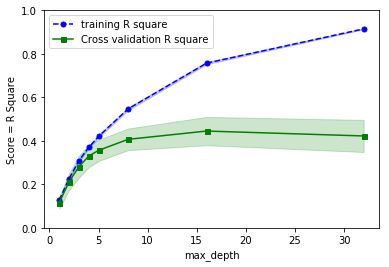

In [52]:
plt.plot(param_range, train_mean, color = 'blue', linestyle = '--', marker = 'o', markersize=5, label='training R square')
plt.plot(param_range, test_mean,color = 'green', marker = 's', markersize=5, label='Cross validation R square')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha = 0.2, color='blue')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.2, color='green')
plt.ylabel ('Score = R Square')
plt.ylim([0,1])
plt.xlabel ('max_depth')
plt.legend()

In [53]:
from sklearn.model_selection import GridSearchCV

param_n_estimators_range = [10, 20, 40, 50]
param_max_depth_range =  [2, 4, 5, 10,20] 
param_max_feature_range = [1,2,4,8,12,16,20,30]

param_grid = [{'n_estimators': param_n_estimators_range, 'max_depth':param_max_depth_range, 'max_features':param_max_feature_range},
              {'n_estimators': param_n_estimators_range, 'max_depth':param_max_depth_range,'max_features':param_max_feature_range, 'bootstrap': ['False']}]

In [54]:
gs = GridSearchCV (estimator=RandomForestRegressor(), param_grid = param_grid, cv=10)
gs = gs.fit (X=x_train, y=y_train.ravel())
print ('The best score is:', gs.best_score_, '\nThe best parameters are:', gs.best_params_)

The best score is: 0.46195294194715186 
The best parameters are: {'bootstrap': 'False', 'max_depth': 20, 'max_features': 8, 'n_estimators': 40}


In [55]:
roc_auc_score(y_test, y_rf_proba[:,1])

0.88330244439992

In [56]:
feature_score = rnd_clf.feature_importances_
feature_score

array([0.25218881, 0.22233031, 0.0142515 , 0.01732183, 0.01109883,
       0.04262815, 0.01770924, 0.00466881, 0.0186899 , 0.00567367,
       0.00930677, 0.00460794, 0.01103195, 0.00326693, 0.01663888,
       0.00266268, 0.01309256, 0.00266304, 0.00542473, 0.01473993,
       0.00366991, 0.01293582, 0.00350836, 0.01080421, 0.00278587,
       0.0055681 , 0.0050986 , 0.00363295, 0.00501054, 0.00856385,
       0.24842533])

In [57]:
feature_names = list(X)
df_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
df_feature_score

,feature,score
0,head_length,0.252189
30,check,0.248425
1,body_length,0.222330
5,Week,0.042628
8,Game,0.018690
6,2017,0.017709
3,excla_body,0.017322
14,Ravens,0.016639
19,Video,0.014740
2,excla,0.014251


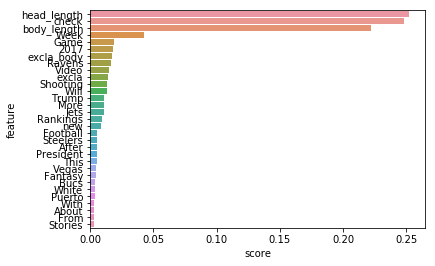

In [58]:
sns.barplot(y="feature", x="score", data=df_feature_score)

In [59]:
from sklearn import ensemble

clf_gb = ensemble.GradientBoostingClassifier(n_estimators=500, max_depth=15,max_features=15,subsample=0.8, learning_rate=0.05, min_samples_split=40)
clf_gb.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=15, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=40,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

In [60]:
from sklearn import ensemble

clf_gb = ensemble.GradientBoostingClassifier(n_estimators=40, max_features=15,max_depth=5)
clf_gb.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=15, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [61]:
y_pred_gb = clf_gb.predict(X_test)

In [62]:
confusion_matrix(y_test, y_pred_gb)

array([[334, 100],
       [ 66, 302]], dtype=int64)

In [63]:
recall_score(y_test, y_pred_gb)

0.8206521739130435

In [64]:
precision_score(y_test, y_pred_gb)

0.7512437810945274

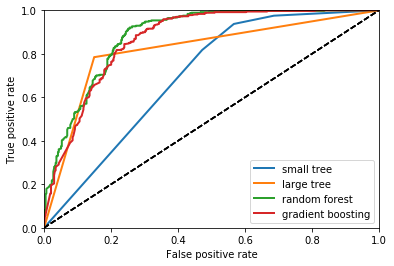

In [65]:
y_gb_proba = clf_gb.predict_proba(X_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_gb_proba[:,1])

plot_roc_curve (fpr, tpr, "small tree")
plot_roc_curve (fpr_large, tpr_large, "large tree")
plot_roc_curve (fpr_rf, tpr_rf, "random forest")
plot_roc_curve (fpr_gb, tpr_gb, "gradient boosting")
plt.legend(loc = "best")
plt.show()

In [66]:
roc_auc_score(y_test, y_gb_proba[:,1])

0.8681000801442598

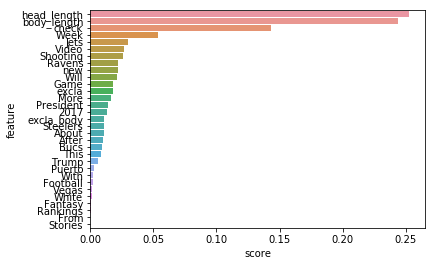

In [67]:
feature_score = clf_gb.feature_importances_

feature_names = list(X)
df_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
sns.barplot(y="feature", x="score", data=df_feature_score)

Trying to Cluster our data based on Trump

In [78]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [82]:
Xcluster = train_df[["Trump", "head_length"]]

mms = MinMaxScaler()
Xcluster = mms.fit_transform(X)

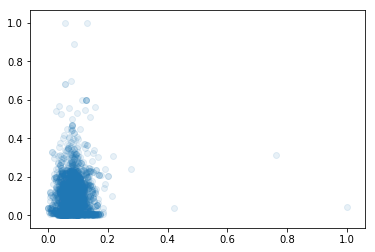

In [83]:
plt.scatter(data = Xcluster, x=Xcluster[:,0], y=Xcluster[:,1], alpha=0.1)

In [84]:
km = KMeans( n_clusters=2 )
y_pred = km.fit_predict(Xcluster)

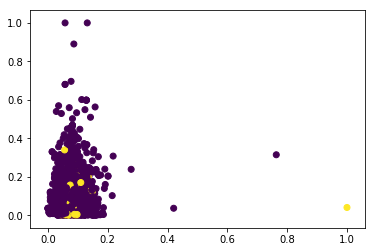

In [85]:
plt.scatter(Xcluster[:,0], Xcluster[:,1], c=y_pred)

In [86]:
print("Internal Sum of Squares = ", km.inertia_)

Internal Sum of Squares =  1764.9158665970695


Text(0,0.5,'Internal Sum of Squares')

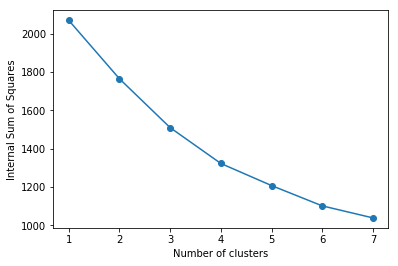

In [88]:
iner_score = []
for i in range (1, 8):   # Go over possible number of clusters i
    km = KMeans (n_clusters=i)
    km.fit(Xcluster)
    iner_score.append(km.inertia_)
plt.plot(range (1, 8), iner_score, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Internal Sum of Squares")

We will choose - 4